# Riboswitch Sequences
We begin by copying down the sequences for the riboswitches from the Penchovsky & Breaker paper.

### YES-1 riboswitch from Figure 2a: 
`GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC`

### NOT-1 riboswitch from Figure 4a: 
`GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC`

### AND-1 riboswitch from Figure 5a: 
`GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGAGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU`

### OR-1 riboswitch from Figure 6a: 
`GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC`

| Riboswitch name | OBS-1 (start, end) coordinates | OBS-2 (start, end) coordinates | Red regions (start, end) coordinates |
|:---------------:|:------------------------------:|:------------------------------:|:------------------------------------:|
|      YES-1      |             (26, 47)            |               N/A              |          (16, 21), (49, 54)          |
|      NOT-1      |            (44, 66)            |               N/A              |          (40, 44), (74, 77)          |
|      AND-1      |            (30, 45)            |            (49, 64)            |          (16, 23), (70, 77)          |
|       OR-1      |            (27, 46)            |            (47, 66)            |          (16, 26), (67, 77)          |

We will generate the `RNAfold` structures for each riboswitch. We also print the `stdout` from `subprocess.PIPE` to verify that an output is created. Finally, we convert the `.ps` output files to `.pdf` format using `ps2pdf`.

In [1]:
import subprocess
from wand.image import Image as WImage

seqs = """
>YES-1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>NOT-1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>AND-1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGAGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>OR-1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"""

p = subprocess.run(['RNAfold'], input=bytes(seqs, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.stdout.decode().split())

ps_files = ["YES-1_ss.ps", "NOT-1_ss.ps", "AND-1_ss.ps", "OR-1_ss.ps"]
for ps_file in ps_files:
    p = subprocess.run(['ps2pdf', '-dEPSCrop', ps_file])

['>YES-1', 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).))))))))', '(-33.00)', '>NOT-1', 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC', '.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....))))', '(-28.10)', '>AND-1', 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGAGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU', '((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).)))))))).........', '(-42.10)', '>OR-1', 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).))))))))', '(-40.00)']


# Riboswitch Plots

Below, we utilize the `wand.image` module to plot the structures predicted by `RNAfold`.

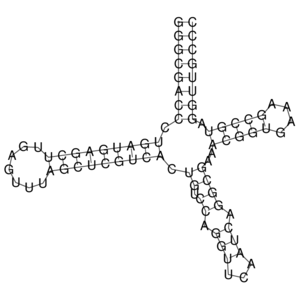

In [2]:
YES_1_img = WImage(filename='YES-1_ss.pdf')
YES_1_img.resize(300, 300)
display(YES_1_img)

The generated structure for the YES-1 riboswitch differs from the native conformation. The stem-loop structures do not match each other. In particular, the `RNAfold` generated structure has 3 hairpins, while the native conformation only has 2. The differences in structure could be explained by different parameters used, such as the temperature or underlying folding algorithm. The red regions are not bound to each other. 

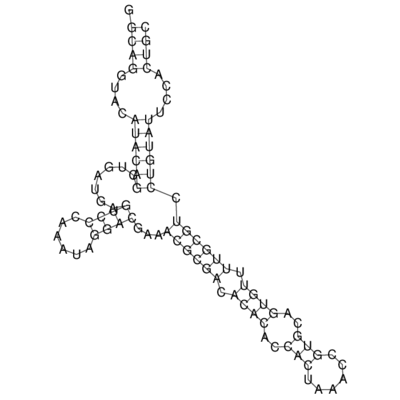

In [3]:
NOT_1_img = WImage(filename='NOT-1_ss.pdf')
NOT_1_img.resize(400, 400)
display(NOT_1_img)

The `RNAfold` predicted structure for the NOT-1 riboswitch above roughly corresponds to the native conformation; there are no major discrepancies. The red regions are bound to each other.

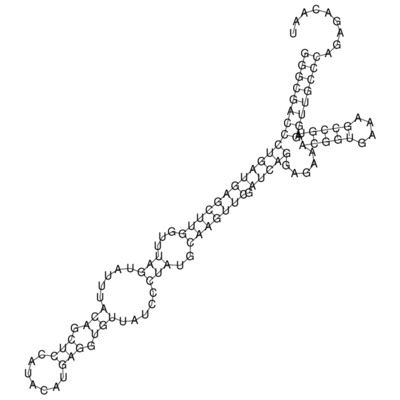

In [4]:
AND_1_img = WImage(filename='AND-1_ss.pdf')
AND_1_img.resize(400, 400)
display(AND_1_img)

Again, we find that the `RNAfold` predicted structure for the AND-1 riboswitch above roughly corresponds to the native conformation; there are no major discrepancies. The red regions have not bound to each other.

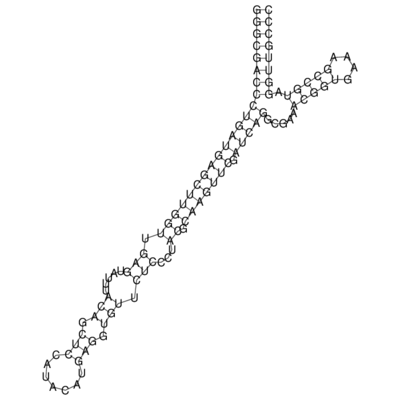

In [5]:
OR_1_img = WImage(filename='OR-1_ss.pdf')
OR_1_img.resize(400, 400)
display(OR_1_img)

Once again, we find that the `RNAfold` predicted structure for the OR-1 riboswitch above roughly corresponds to the native conformation; there are no major discrepancies. The red regions have not bound to each other.

# OBS Binding Simulation

In [6]:
paths = ['YES-1_constraints.txt', 'NOT-1_constraints.txt',
         'AND-1_constraints1.txt', 'AND-1_constraints2.txt', 'AND-1_constraints3.txt',
         'OR-1_constraints1.txt', 'OR-1_constraints2.txt', 'OR-1_constraints3.txt']
for path in paths:
    p = subprocess.run(['RNAfold', '-C', path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(p.stdout.decode().split())
ps_files = ['YES-1_constrained_ss.ps', 'NOT-1_constrained_ss.ps',
            'AND-1_constrained1_ss.ps', 'AND-1_constrained2_ss.ps', 'AND-1_constrained3_ss.ps',
            'OR-1_constrained1_ss.ps', 'OR-1_constrained2_ss.ps', 'OR-1_constrained3_ss.ps']
for ps_file in ps_files:
    p = subprocess.run(['ps2pdf', '-dEPSCrop', ps_file])

['>YES-1_constrained', 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '((((((((.......((((((...........................))))))...(((((....))))).))))))))', '(-24.50)']
['>NOT-1_constrained', 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC', '.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....))))', '(-20.80)']
['>AND-1_constrained1', 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGAGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU', '((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).)))))))).........', '(-33.90)']
['>AND-1_constrained2', 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGAGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU', '(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).)))))))).........', '(-29.60)']
['>AND-1_constrained3', 'GGGCGACCC

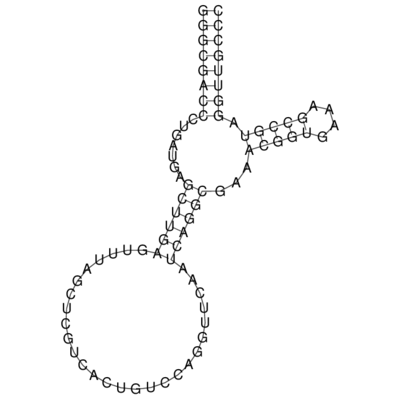

In [7]:
YES_1_constrained_img = WImage(filename='YES-1_constrained_ss.pdf')
YES_1_constrained_img.resize(400, 400)
display(YES_1_constrained_img)

With the constraints, the result of folding looks like the self-cleaving form of YES-1 in Figure 2. The red regions are bound to each other precisely.

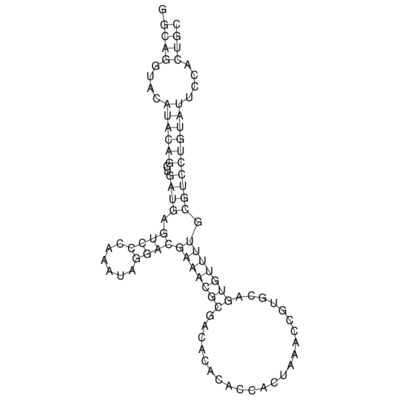

In [8]:
NOT_1_constrained_img = WImage(filename='NOT-1_constrained_ss.pdf')
NOT_1_constrained_img.resize(400, 400)
display(NOT_1_constrained_img)

With the constraints, the result of folding does **not** look like the self-cleaving form of NOT-1 in Figure 4. The red regions are bound to each other precisely.

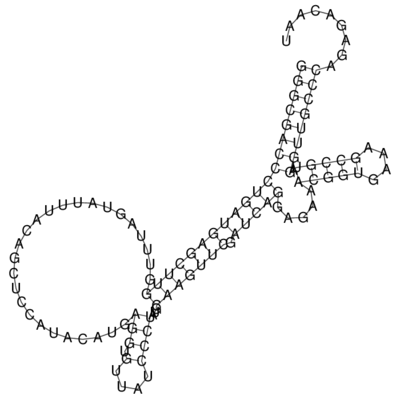

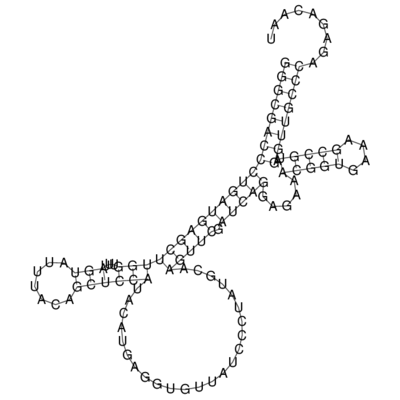

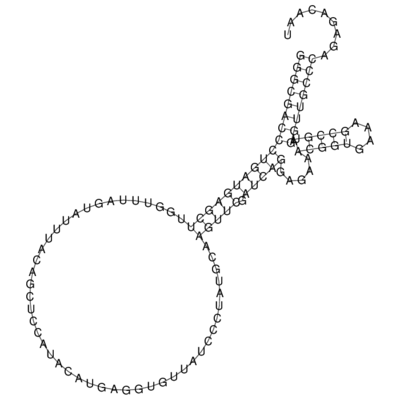

In [9]:
AND_1_constrained1_img = WImage(filename='AND-1_constrained1_ss.pdf')
AND_1_constrained1_img.resize(400, 400)
display(AND_1_constrained1_img)

AND_1_constrained2_img = WImage(filename='AND-1_constrained2_ss.pdf')
AND_1_constrained2_img.resize(400, 400)
display(AND_1_constrained2_img)

AND_1_constrained3_img = WImage(filename='AND-1_constrained3_ss.pdf')
AND_1_constrained3_img.resize(400, 400)
display(AND_1_constrained3_img)

In the first plot, OBS-1 is constrained. This corresponds to inputs of `0` and `1`. The red regions are not bound to each other. 

In the second plot, OBS-2 is constrained. This corresponds to inputs of `1` and `0`. The red regions are not bound to each other.

In the third plot, OBS-1 and OBS-2 are constrained. This corresponds to inputs of `1` and `1`. The red regions are bound to each other.

### AND-1 Truth Table

| Input 1 	| Input 2 	| Output 	|
|:-------:	|:-------:	|:------:	|
|    F    	|    F    	|    F   	|
|    T    	|    F    	|    F   	|
|    F    	|    T    	|    F   	|
|    T    	|    T    	|    T   	|

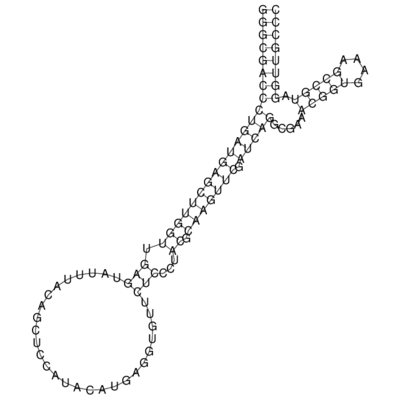

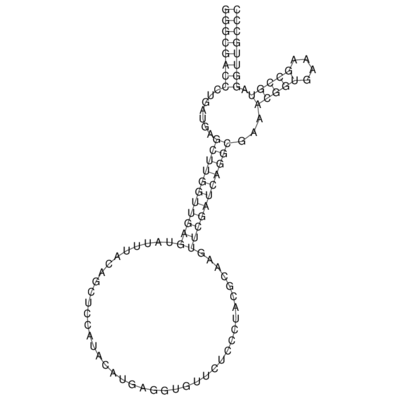

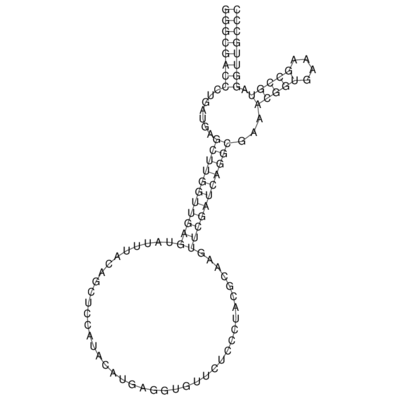

In [10]:
OR_1_constrained1_img = WImage(filename='OR-1_constrained1_ss.pdf')
OR_1_constrained1_img.resize(400, 400)
display(OR_1_constrained1_img)

OR_1_constrained2_img = WImage(filename='OR-1_constrained2_ss.pdf')
OR_1_constrained2_img.resize(400, 400)
display(OR_1_constrained2_img)

OR_1_constrained3_img = WImage(filename='OR-1_constrained3_ss.pdf')
OR_1_constrained3_img.resize(400, 400)
display(OR_1_constrained3_img)

In the first plot, OBS-1 is constrained. This corresponds to inputs of `0` and `1`. The red regions are bound to each other.

In the second plot, OBS-2 is constrained. This corresponds to inputs of `1` and `0`. The red regions are bound to each other.

In the third plot, OBS-1 and OBS-2 are constrained. This corresponds to inputs of `1` and `1`. The red regions are bound to each other.

### OR-1 Truth Table

| Input 1 	| Input 2 	| Output 	|
|:-------:	|:-------:	|:------:	|
|    F    	|    F    	|    F   	|
|    T    	|    F    	|    T   	|
|    F    	|    T    	|    T   	|
|    T    	|    T    	|    T   	|

**The truth tables for the AND-1 and OR-1 riboswithces match the expected truth tables, according to the paper. Therefore, they work as the paper claims!**